# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [420]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from joblib import dump, load
import numpy as np

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [421]:
df = pd.read_csv("../data/dayofweek.csv")
df.head()

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [422]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [424]:
print(y_test.value_counts())
print(y_train.value_counts())

dayofweek
3    83
6    69
5    55
1    52
0    31
4    24
2    24
Name: count, dtype: int64
dayofweek
3    313
6    287
1    222
5    216
2    125
0    105
4     80
Name: count, dtype: int64


In [425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=21, 
                                                    stratify=y)

In [426]:
print(y_test.value_counts())
print(y_train.value_counts())

dayofweek
3    80
6    71
1    55
5    54
2    30
0    27
4    21
Name: count, dtype: int64
dayofweek
3    316
6    285
1    219
5    217
2    119
0    109
4     83
Name: count, dtype: int64


## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [427]:
model_log = LogisticRegression(random_state=21, fit_intercept=False)
model_log.fit(X_train, y_train)
model_pred = model_log.predict(X_test)
accuracy_score(y_test, model_pred)

0.6331360946745562

### b. SVM

In [428]:
model_svc = SVC(kernel='linear', probability=True, random_state=21)
model_svc.fit(X_train, y_train)
model_pred = model_svc.predict(X_test)
accuracy_score(y_test, model_pred)

0.7159763313609467

### c. Decision tree

In [429]:
tree = DecisionTreeClassifier(max_depth=4, random_state=21)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
accuracy_score(y_test, tree_pred)

0.5295857988165681

### d. Random forest

In [430]:
model_forest = RandomForestClassifier(n_estimators=100, max_depth = 25, random_state=21)
model_forest.fit(X_train, y_train)
model_pred = model_forest.predict(X_test)
accuracy_score(y_test, model_pred)

0.9289940828402367

##### Все модели показали различные значения метрик. Наибольшую разницу по сравнении с остальными моделями имеет Random Forest.

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [431]:
model_log = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear')
scores = cross_val_score(model_log, X_train, y_train, cv=10, scoring='accuracy')

In [432]:
print(f"Оценки точности для каждого фолда: {scores}")
print(f"Средняя точность: {scores.mean():.4f}")
print(f"Стандартное отклонение точности: {scores.std():.4f}")

Оценки точности для каждого фолда: [0.56296296 0.61481481 0.59259259 0.60740741 0.55555556 0.57777778
 0.61481481 0.53333333 0.58208955 0.57462687]
Средняя точность: 0.5816
Стандартное отклонение точности: 0.0253


### b. SVM

In [433]:
model_svm = SVC(kernel='linear', probability=True, random_state=21)
scores = cross_val_score(model_svm, X_train, y_train, cv=10, scoring='accuracy')
print(f"Оценки точности для каждого фолда: {scores}")
print(f"Средняя точность: {scores.mean():.4f}")
print(f"Стандартное отклонение точности: {scores.std():.4f}")

Оценки точности для каждого фолда: [0.65925926 0.75555556 0.62222222 0.65185185 0.65185185 0.64444444
 0.72592593 0.62222222 0.61940299 0.63432836]
Средняя точность: 0.6587
Стандартное отклонение точности: 0.0436


### c. Decision tree

In [434]:
tree = DecisionTreeClassifier(max_depth=4, random_state=21)
scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')
print(f"Оценки точности для каждого фолда: {scores}")
print(f"Средняя точность: {scores.mean():.4f}")
print(f"Стандартное отклонение точности: {scores.std():.4f}")

Оценки точности для каждого фолда: [0.48148148 0.52592593 0.47407407 0.52592593 0.57037037 0.51111111
 0.5037037  0.48888889 0.54477612 0.46268657]
Средняя точность: 0.5089
Стандартное отклонение точности: 0.0319


### d. Random forest

In [435]:
model_forest = RandomForestClassifier(n_estimators=100, max_depth = 25, random_state=21)
scores = cross_val_score(model_forest, X_train, y_train, cv=10, scoring='accuracy')
print(f"Оценки точности для каждого фолда: {scores}")
print(f"Средняя точность: {scores.mean():.4f}")
print(f"Стандартное отклонение точности: {scores.std():.4f}")

Оценки точности для каждого фолда: [0.9037037  0.96296296 0.8962963  0.94074074 0.91851852 0.8962963
 0.92592593 0.8962963  0.93283582 0.90298507]
Средняя точность: 0.9177
Стандартное отклонение точности: 0.0216


## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [436]:
result = []
estimators = [100, 300, 500]
best_scores = 0
depth = [15, 25, 35]
for max_depth in depth:
    for n_estimators in estimators:
        model_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=21)
        scores = cross_val_score(model_forest, X_train, y_train, cv=10, scoring='accuracy')
        if scores.mean() > best_scores:
            best_depth = max_depth
            best_estimators = n_estimators
            best_scores = scores.mean()
            best_model = model_forest
        result.append({'max_depth': max_depth, 'estimators': n_estimators, 'accuracy_score': scores.mean()})
result_df = pd.DataFrame(result)
result_df

,max_depth,estimators,accuracy_score
0,15,100,0.896125
1,15,300,0.895379
2,15,500,0.896855
3,25,100,0.917656
4,25,300,0.911714
5,25,500,0.912454
6,35,100,0.913941
7,35,300,0.913947
8,35,500,0.914688


In [437]:
print(f'Лучший результат: {best_scores}')
print(f'Параметры результата: max_depth = {best_depth}, n_estimators = {best_estimators}')

Лучший результат: 0.9176561636263129
Параметры результата: max_depth = 25, n_estimators = 100


In [438]:
best_model.fit(X_train, y_train)
predict = best_model.predict(X_test)
accuracy_score(y_test, predict)

0.9289940828402367

In [439]:
def draw_plot(coefficients, feature_names, top_n=10):
    if len(coefficients.shape) > 1:
        mean_coef = np.mean(np.abs(coefficients), axis=0)
        top_indices = np.argsort(mean_coef)[-top_n:]
        top_coef = mean_coef[top_indices]
        top_future_name = [feature_names[i] for i in top_indices]
    else:
        top_indices = np.argsort(np.abs(coefficients))[-top_n:]
        top_coef = coefficients[top_indices]
        top_future_name = [feature_names[i] for i in top_indices]

    plt.figure(figsize=(15, 8))
    plt.barh(range(top_n), top_coef, align='center')
    plt.yticks(range(top_n), top_future_name)
    plt.xlabel("Importance (Absolute Value)")
    plt.title(f"Top {top_n} Most Important Features")
    plt.show()

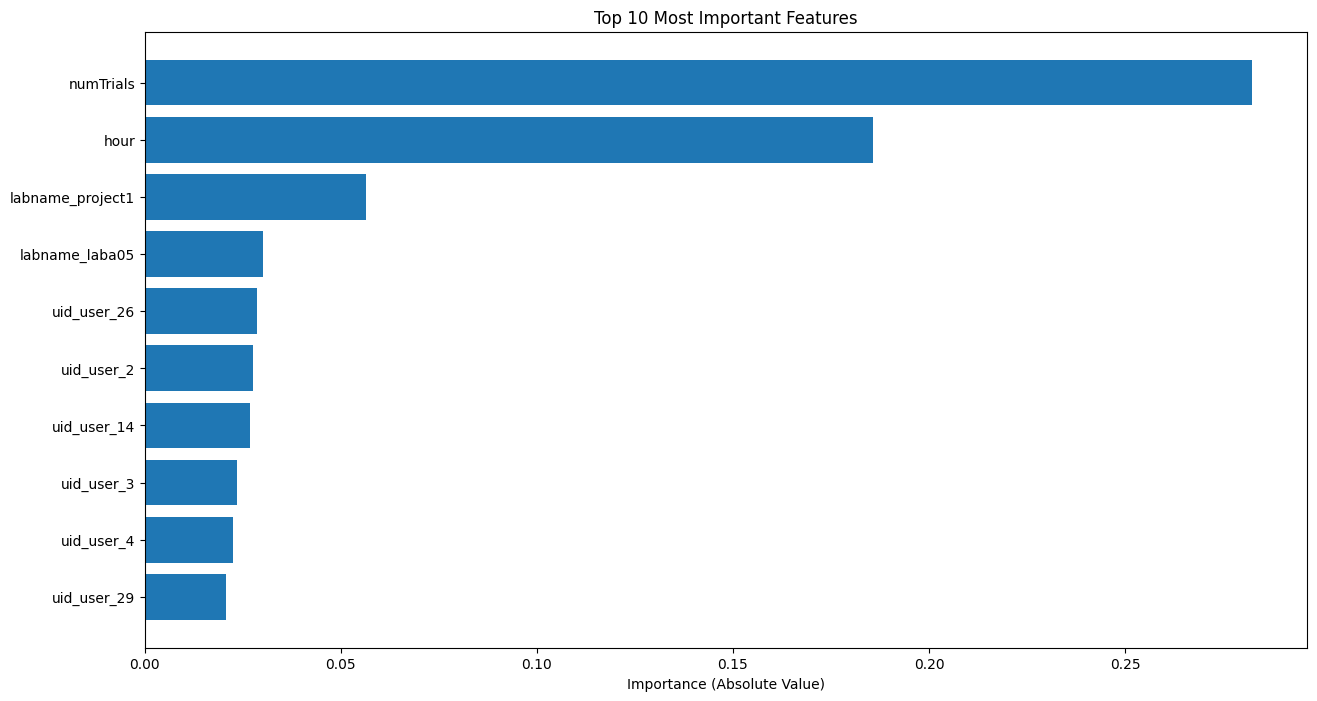

In [440]:
draw_plot(best_model.feature_importances_, X.columns)

In [441]:
dump(best_model, '../model/random_forest_model.joblib')

['../model/random_forest_model.joblib']

In [442]:
loaded_model = load('../model/random_forest_model.joblib')

In [443]:
predict = loaded_model.predict(X_test)
accuracy_score(y_test, predict)

0.9289940828402367